# Feature Engineering + Machine Learning

In [1]:
%config Completer.use_jedi = False 

# Data manipulation

import numpy as np
import pandas as pd

# Visualization 

import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

from sklearn.preprocessing import StandardScaler


In [2]:
pd.set_option('display.max_columns', 30, 'display.max_rows',30)
df = pd.read_csv('Data/windProject_4ML.csv')
df['slice dt iso'] = pd.to_datetime(df['slice dt iso'])
df.reset_index(drop=True, inplace=True)
df.head(19)

,slice dt iso,lat,lon,temperature,dew_point,pressure,humidity,clouds,wind_speed,wind_deg,rain,convective,Direction N-S,Direction E-W,Compass,Tarifa_WindGust,Tarifa_Wind,Tarifa_WindDirection,Tarifa_Direction N-S,Tarifa_Direction E-W,Tarifa Compass,delta_Wind,delta_N-S,delta_E-W
0,2019-02-16 09:00:00,36.013158,-5.598892,13.79,11.13,1021.601,83.994,100.0,25.963871,95.202,0.125,0.125,-0.090667,0.995881,E,35.118709,17.624149,72.0,0.309017,0.951057,NEE,-8.339722,0.399684,-0.044825
1,2019-02-16 12:00:00,36.013158,-5.598892,13.81,11.16,1022.066,84.064,96.0,25.437090,93.856,0.375,0.375,-0.067249,0.997736,E,35.053915,21.835803,86.0,0.069756,0.997564,E,-3.601288,0.137006,-0.000172
2,2019-02-16 15:00:00,36.013158,-5.598892,13.82,11.15,1020.887,83.926,92.0,23.938390,93.883,0.188,0.188,-0.067719,0.997704,E,34.859531,20.539909,82.0,0.139173,0.990268,E,-3.398480,0.206892,-0.007436
3,2019-02-16 18:00:00,36.013158,-5.598892,13.77,11.27,1020.964,84.583,94.0,19.924360,95.812,0.312,0.312,-0.101265,0.994860,E,35.766656,23.326080,87.0,0.052336,0.998630,E,3.401720,0.153601,0.003770
4,2019-02-16 21:00:00,36.013158,-5.598892,13.74,11.24,1022.636,84.845,88.0,16.271885,94.213,0.000,0.000,-0.073464,0.997298,E,NaN,NaN,83.0,0.121869,0.992546,E,NaN,0.195334,-0.004752
5,2019-02-17 00:00:00,36.013158,-5.598892,13.46,11.32,1022.517,87.100,NaN,14.936467,85.708,NaN,NaN,0.074839,0.997196,E,NaN,NaN,86.0,0.069756,0.997564,E,NaN,-0.005083,0.000368
6,2019-02-17 03:00:00,36.013158,-5.598892,13.29,11.27,1022.013,87.910,30.0,13.045110,86.737,0.000,0.062,0.056919,0.998379,E,NaN,NaN,85.0,0.087156,0.996195,E,NaN,0.030236,-0.002184
7,2019-02-17 06:00:00,36.013158,-5.598892,13.06,11.45,1022.144,89.724,30.0,12.724377,82.540,0.000,0.062,0.129834,0.991536,E,NaN,NaN,82.0,0.139173,0.990268,E,NaN,0.009339,-0.001268
8,2019-02-17 09:00:00,36.013158,-5.598892,13.35,11.10,1022.389,86.763,26.0,13.155909,82.648,0.000,0.000,0.127965,0.991779,E,NaN,NaN,27.0,0.891007,0.453990,NNE,NaN,0.763042,-0.537788
9,2019-02-17 12:00:00,36.013158,-5.598892,13.84,11.07,1022.302,83.282,18.0,12.549431,92.281,0.000,0.000,-0.039800,0.999208,E,NaN,NaN,284.0,0.241922,-0.970296,WNW,NaN,0.281722,-1.969503


## 1 NaN/Nulls Values Treatment

Just one last step now that we have dropped few columns that are not interesed or can prvoce noise in our project,we can do a small paragraph and handle NaN / Null values before starting with machine learning 

In [3]:
df.isna().sum()

slice dt iso              0
lat                       0
lon                       0
temperature               0
dew_point                 0
pressure                  0
humidity                  0
clouds                  793
wind_speed                0
wind_deg                  0
rain                    120
convective              793
Direction N-S             0
Direction E-W             0
Compass                   0
Tarifa_WindGust          29
Tarifa_Wind              19
Tarifa_WindDirection     17
Tarifa_Direction N-S     17
Tarifa_Direction E-W     17
Tarifa Compass            0
delta_Wind               19
delta_N-S                17
delta_E-W                17
dtype: int64

- **Tarifa Wind**

In [4]:
df[df['Tarifa_Wind'].isna()==True].index

Int64Index([4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22,
            23],
           dtype='int64')

**Strategy:**

- Tarifa Wind NaN - This is the meassurement for the weather station, they are consecutive registers, probably due to a problem in the station. If they were distributed we couuld filled them with the forecast wind, but cause they are all consecutive and in a two days period, giving them an aritifical value just give us more artificial accuracy in the artificial model. Also they are 19 cases out of 6346 (0.2%) so we opt for delleting all the registers for that two days. 

In [5]:
df.dropna(subset=['Tarifa_Wind'], inplace=True)
df.reset_index(drop=True, inplace=True)

* **Wind direction**

In [6]:
df.isna().sum()

slice dt iso              0
lat                       0
lon                       0
temperature               0
dew_point                 0
pressure                  0
humidity                  0
clouds                  790
wind_speed                0
wind_deg                  0
rain                    117
convective              790
Direction N-S             0
Direction E-W             0
Compass                   0
Tarifa_WindGust          10
Tarifa_Wind               0
Tarifa_WindDirection     11
Tarifa_Direction N-S     11
Tarifa_Direction E-W     11
Tarifa Compass            0
delta_Wind                0
delta_N-S                11
delta_E-W                11
dtype: int64

In [7]:
df[df['Tarifa_WindDirection'].isna()==True].index

Int64Index([6, 3262, 3263, 3264, 3265, 3266, 3267, 3268, 3269, 3270, 3271], dtype='int64')

In [8]:
df[df['Tarifa_WindGust'].isna()==True].index

Int64Index([3262, 3263, 3264, 3265, 3266, 3267, 3268, 3269, 3270, 3271], dtype='int64')

In [9]:
df[df['Tarifa Compass']=='0']

,slice dt iso,lat,lon,temperature,dew_point,pressure,humidity,clouds,wind_speed,wind_deg,rain,convective,Direction N-S,Direction E-W,Compass,Tarifa_WindGust,Tarifa_Wind,Tarifa_WindDirection,Tarifa_Direction N-S,Tarifa_Direction E-W,Tarifa Compass,delta_Wind,delta_N-S,delta_E-W
6,2019-02-19 12:00:00,36.013158,-5.598892,14.08,9.95,1019.695,75.97,1.0,9.672548,97.588,0.000,0.000,-0.132049,0.991243,E,17.300176,12.051808,NaN,NaN,NaN,0,2.379260,NaN,NaN
3262,2020-04-23 15:00:00,36.013158,-5.598892,16.95,13.65,1012.612,80.90,100.0,20.602760,89.622,0.000,0.000,0.006597,0.999978,E,NaN,24.168411,NaN,NaN,NaN,0,3.565651,NaN,NaN
3263,2020-04-23 18:00:00,36.013158,-5.598892,16.16,13.67,1012.835,85.20,100.0,17.797799,85.383,0.000,0.000,0.080495,0.996755,E,NaN,22.094981,NaN,NaN,NaN,0,4.297182,NaN,NaN
3264,2020-04-23 21:00:00,36.013158,-5.598892,15.94,13.93,1014.030,88.00,100.0,18.371232,86.372,0.000,0.000,0.063278,0.997996,E,NaN,21.771008,NaN,NaN,NaN,0,3.399776,NaN,NaN
3265,2020-04-24 00:00:00,36.013158,-5.598892,15.74,14.06,1013.957,89.60,NaN,17.842507,87.502,1.000,NaN,0.043585,0.999050,E,NaN,20.345525,NaN,NaN,NaN,0,2.503018,NaN,NaN
3266,2020-04-24 03:00:00,36.013158,-5.598892,15.53,13.65,1011.309,89.00,92.0,18.655032,83.419,0.062,0.062,0.114608,0.993411,E,NaN,21.123061,NaN,NaN,NaN,0,2.468029,NaN,NaN
3267,2020-04-24 06:00:00,36.013158,-5.598892,15.55,13.09,1011.161,85.80,94.0,19.360646,88.095,0.062,0.062,0.033242,0.999447,E,NaN,21.965392,NaN,NaN,NaN,0,2.604746,NaN,NaN
3268,2020-04-24 09:00:00,36.013158,-5.598892,15.67,13.52,1010.775,86.70,100.0,20.653300,86.206,0.125,0.188,0.066169,0.997808,E,NaN,25.399509,NaN,NaN,NaN,0,4.746209,NaN,NaN
3269,2020-04-24 15:00:00,36.013158,-5.598892,16.15,13.95,1007.625,86.60,99.0,19.867989,82.456,0.125,0.500,0.131288,0.991344,E,NaN,21.447035,NaN,NaN,NaN,0,1.579046,NaN,NaN
3270,2020-04-24 18:00:00,36.013158,-5.598892,15.75,13.93,1008.270,88.70,99.0,18.176848,87.254,0.312,0.688,0.047908,0.998852,E,NaN,19.827168,NaN,NaN,NaN,0,1.650320,NaN,NaN


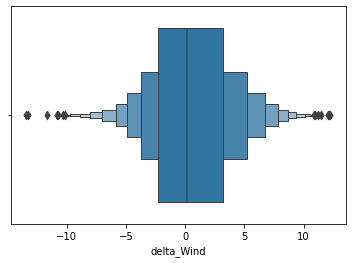

In [10]:
sns.boxenplot(x=df['delta_Wind']);

**Strategy:**

- Tarifa Wind direction (and artifical created variables N/S E/O and compass) . We have just 11 missing values. The boxplot above shows that the deviation is generally less than ~10º and it s centered on 0º so we can approximate that registers with the forecast meassure, then we dont loose information and we are not affecting signifcatnly the data. 

In [11]:
df['Tarifa_WindDirection'].fillna(df['wind_deg'], inplace=True)
df['Tarifa_Direction N-S'].fillna(df['Direction N-S'], inplace=True)
df['Tarifa_Direction E-W'].fillna(df['Direction E-W'], inplace=True)

In [12]:
df['delta_Wind'] = df['Tarifa_Wind']-df['wind_speed']
df['delta_N-S'] = df['Tarifa_Direction N-S'] - df['Direction N-S'] 
df['delta_E-W'] = df['Tarifa_Direction E-W'] - df['Direction E-W']

In [13]:
df.isna().sum()

slice dt iso              0
lat                       0
lon                       0
temperature               0
dew_point                 0
pressure                  0
humidity                  0
clouds                  790
wind_speed                0
wind_deg                  0
rain                    117
convective              790
Direction N-S             0
Direction E-W             0
Compass                   0
Tarifa_WindGust          10
Tarifa_Wind               0
Tarifa_WindDirection      0
Tarifa_Direction N-S      0
Tarifa_Direction E-W      0
Tarifa Compass            0
delta_Wind                0
delta_N-S                 0
delta_E-W                 0
dtype: int64

- **Tarifa WindGust** . has a strong linear relation with wind, then we do a fast linear regression to fill the missing values

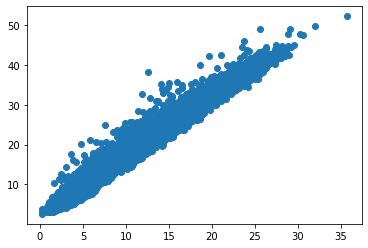

In [14]:
plt.scatter(y = df['Tarifa_WindGust'],x = df['Tarifa_Wind']);

In [15]:
from scipy.stats import linregress

linregress(df.dropna()['Tarifa_Wind'], df.dropna()['Tarifa_WindGust'])

LinregressResult(slope=1.5001229469033877, intercept=2.3636408838850045, rvalue=0.9811683750312548, pvalue=0.0, stderr=0.003972669756927284)

In [16]:
df['Tarifa_WindGust'].fillna(df['Tarifa_Wind']*1.5+2.36, inplace=True)

In [17]:
df.isna().sum()

slice dt iso              0
lat                       0
lon                       0
temperature               0
dew_point                 0
pressure                  0
humidity                  0
clouds                  790
wind_speed                0
wind_deg                  0
rain                    117
convective              790
Direction N-S             0
Direction E-W             0
Compass                   0
Tarifa_WindGust           0
Tarifa_Wind               0
Tarifa_WindDirection      0
Tarifa_Direction N-S      0
Tarifa_Direction E-W      0
Tarifa Compass            0
delta_Wind                0
delta_N-S                 0
delta_E-W                 0
dtype: int64

- **rain**

In [18]:
mask = df['rain'].isna()
df[mask]

,slice dt iso,lat,lon,temperature,dew_point,pressure,humidity,clouds,wind_speed,wind_deg,rain,convective,Direction N-S,Direction E-W,Compass,Tarifa_WindGust,Tarifa_Wind,Tarifa_WindDirection,Tarifa_Direction N-S,Tarifa_Direction E-W,Tarifa Compass,delta_Wind,delta_N-S,delta_E-W
10,2019-02-20,36.013158,-5.598892,12.54,10.52,1021.143,87.831,NaN,8.564559,78.387,NaN,NaN,0.201300,0.979530,NEE,24.492384,15.421131,87.0,0.052336,0.998630,E,6.856572,-0.148964,0.019100
18,2019-02-21,36.013158,-5.598892,12.99,11.06,1024.057,88.100,NaN,15.274695,82.085,NaN,NaN,0.137704,0.990473,E,32.915691,20.539909,77.0,0.224951,0.974370,NEE,5.265215,0.087247,-0.016103
26,2019-02-22,36.013158,-5.598892,12.71,11.02,1029.674,89.551,NaN,14.932579,78.999,NaN,NaN,0.190826,0.981624,E,30.971851,18.725659,74.0,0.275637,0.961262,NEE,3.793080,0.084811,-0.020362
34,2019-02-23,36.013158,-5.598892,12.22,10.06,1029.572,86.651,NaN,6.756788,81.364,NaN,NaN,0.150157,0.988662,E,23.002107,14.125237,76.0,0.241922,0.970296,NEE,7.368449,0.091765,-0.018367
42,2019-02-24,36.013158,-5.598892,13.71,8.22,1026.179,69.222,NaN,3.491137,271.500,NaN,NaN,0.026177,-0.999657,W,4.017269,1.943840,23.0,0.920505,0.390731,NNE,-1.547297,0.894328,1.390388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,2019-06-12,36.013158,-5.598892,16.65,14.45,1010.989,86.700,NaN,7.956137,250.060,NaN,NaN,-0.341036,-0.940050,SWW,9.006459,4.730011,290.0,0.342020,-0.939693,WNW,-3.226126,0.683056,0.000358
914,2019-06-14,36.013158,-5.598892,17.13,13.85,1014.610,80.800,NaN,9.779459,247.008,NaN,NaN,-0.390603,-0.920559,SWW,18.531275,11.922219,228.0,-0.669131,-0.743145,SW,2.142760,-0.278528,0.177415
922,2019-06-15,36.013158,-5.598892,15.15,11.55,1019.531,79.700,NaN,10.955482,278.551,NaN,NaN,0.148690,-0.988884,W,10.043173,5.831520,315.0,0.707107,-0.707107,NW,-5.123962,0.558417,0.281777
930,2019-06-16,36.013158,-5.598892,15.95,12.17,1017.110,77.800,NaN,6.080332,265.343,NaN,NaN,-0.081191,-0.996699,W,6.868235,3.110144,261.0,-0.156434,-0.987688,W,-2.970188,-0.075244,0.009010


median:  0.0 
mean : 0.21884959742351004
percentage of 3h slice without rain 77.9 %



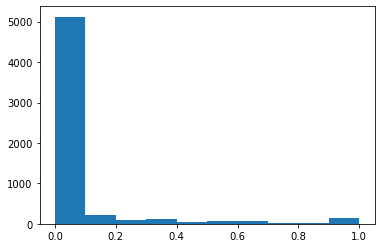

In [19]:
plt.hist(df['rain'], bins=10, range = (0,1));
print("median: " , df['rain'].median(),"\nmean :", df['rain'].mean())
print("percentage of 3h slice without rain", round (df[df['rain']==0]['rain'].count()/len(df)*100,1) , "%\n")

- **Strategy** Because 77.9 % of 3h slices has no rain, we better approximate the NaN in rain with the median 0.0 than with the mean value, what would imply commiting sistematic error in 77.9 % of the cases in average. In the 22.1 % of the cases where there should be rain and we fill the na with 0.0 rain we would have a deviation of 0,21 from the mean value. 

In [20]:
df['rain'].fillna(0, inplace=True)

- **clouds**

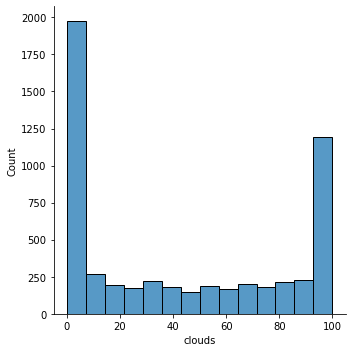

In [21]:
sns.displot(df['clouds'])

median:  33.0 % ; mean:  42.71 %
average clouds when no rain 33.9 %
average clouds when it is rainy 75.96 %


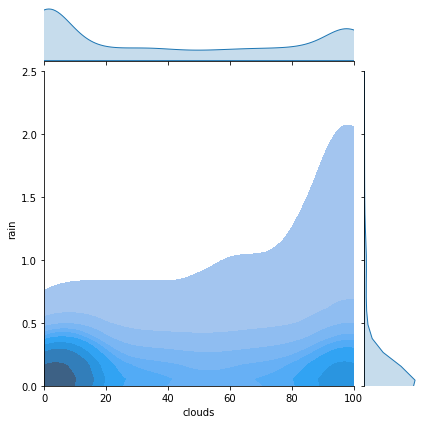

In [22]:
sns.jointplot(x=df['clouds'],y=df['rain'], kind = 'kde', fill = True, xlim=(0,100),  ylim=(0,2.5));
print("median: ", df['clouds'].median(), "%", "; mean: ", round(df['clouds'].mean(),2), "%")
print("average clouds when no rain", round (df[df['rain']==0]['clouds'].mean(),2), "%")
print("average clouds when it is rainy", round(df[df['rain']!=0]['clouds'].mean(),2), "%")

- **Strategy** We are going to fill the na in clouds with this values:

average clouds when no rain 33.9 %
average clouds when it is rainy 75.96 %

## *!!! Por ahora lo he rellenado con la mediana arreglar más adelante!!!*

In [23]:
df['clouds'].fillna(df['clouds'].mean(), inplace=True)

* **convective**

In [24]:
df.isna().sum()

slice dt iso              0
lat                       0
lon                       0
temperature               0
dew_point                 0
pressure                  0
humidity                  0
clouds                    0
wind_speed                0
wind_deg                  0
rain                      0
convective              790
Direction N-S             0
Direction E-W             0
Compass                   0
Tarifa_WindGust           0
Tarifa_Wind               0
Tarifa_WindDirection      0
Tarifa_Direction N-S      0
Tarifa_Direction E-W      0
Tarifa Compass            0
delta_Wind                0
delta_N-S                 0
delta_E-W                 0
dtype: int64

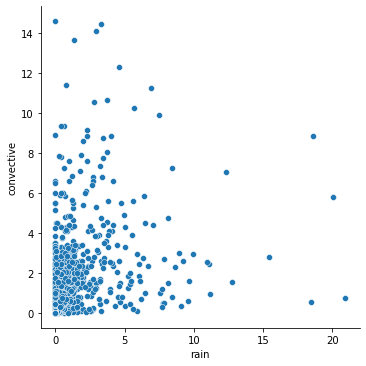

In [25]:
sns.relplot(x = df['rain'], y = df['convective']);

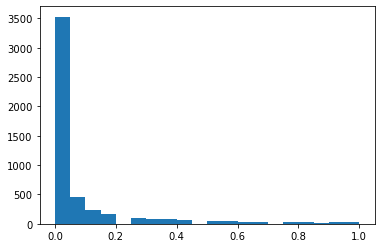

In [26]:
plt.hist(x= df['convective'], bins = 20, range=(0,1));

In [27]:
print(df['convective'].mean())
print(df['rain'].mean())

0.3436812353259879
0.21480259206574953


In [28]:
print('convective median value when no rain', df[df['rain']==0]['convective'].median())
print('convective median value when rain', df[df['rain']!=0]['convective'].median())

convective median value when no rain 0.0
convective median value when rain 0.625


In [29]:
aux = df[df['convective'].isna()]
print ('convective nan with no rain', aux[aux['rain']==0].shape[0])
print ('convective nan with rain', aux[aux['rain']!=0].shape[0])


convective nan with no rain 671
convective nan with rain 119


- **Strategy**

We dont find a clear linear relation between rain and convective (convective rain).
what we found is that when there rain = 0, convective rain median value is also 0.
Then...

WE can approximate the missing values of convective (rain) by:
-  **0 when rain is 0**
-  **0.625 (median value of convective rain when rain != 0 .**


- *Lo aproximo provisionalmente con el valor de la lluvia cambiar más adelante!!*

In [30]:
df['convective'].fillna(df['rain'], inplace =True)

-  Outliers treatment (*En stand by*)

- Wind Degree treatment (hecho en el capitulo 1 pasar aqui)

# Machine Learning Model Optimization

In [31]:
# Function to evaluate model errors

def evaluate(model, target_test, prediction):
    
    mse_baseline = 14.736625426488391
    
    mse = round(mean_squared_error(target_test, prediction), 3)
    mae = round(mean_absolute_error(target_test, prediction), 3)
    mape = "standby"
    #mape = round(float(np.mean(np.abs(target_test - prediction) / target_test)),3)
    ev = round(explained_variance_score(target_test, prediction), 3)
    r2 = round(1 - mse/mse_baseline,3)
    
    new_row = {"model" : model , "mse": mse, "mae" : mae, 
          "mape": mape, "ev" : ev, "r2" : r2}
    
    return new_row

In [32]:
# We re going to create a Dataframe to collect metric values

metrics = pd.DataFrame(columns = ("model", "mse", "mae","mape", "ev", "r2"))

## 1.-  Evaluation of openweathermap.org forecast model (baseline)

First step is to measure how good is the forecast model that for us is used as features, and it s going to be the model to challenge. 

**We are going to use the metric R2 with the MSE of the Weather Forecast as a baseline, to see how do we improve in relation to that model.**

In [33]:
target_baseline = df['Tarifa_Wind']
prediction_baseline = df['wind_speed']

In [34]:
metrics = metrics.append(evaluate("baseline", target_baseline,prediction_baseline), 
                         ignore_index=True)

metrics

,model,mse,mae,mape,ev,r2
0,baseline,14.737,3.102,standby,0.617,-0.0


## 2.- Regressors  without further preprocesing

- Linnear Regressor
- KNeighbours
- Decission Tree
- Random Forest

In [35]:
df.columns

Index(['slice dt iso', 'lat', 'lon', 'temperature', 'dew_point', 'pressure',
       'humidity', 'clouds', 'wind_speed', 'wind_deg', 'rain', 'convective',
       'Direction N-S', 'Direction E-W', 'Compass', 'Tarifa_WindGust',
       'Tarifa_Wind', 'Tarifa_WindDirection', 'Tarifa_Direction N-S',
       'Tarifa_Direction E-W', 'Tarifa Compass', 'delta_Wind', 'delta_N-S',
       'delta_E-W'],
      dtype='object')

In [36]:
features = df.loc[:,['temperature', 'dew_point', 'pressure','humidity', 'clouds',
                     'wind_speed', 'rain', 'convective','Direction N-S', 'Direction E-W']]

In [37]:
target = df.loc[:,['Tarifa_Wind']]

<AxesSubplot:>

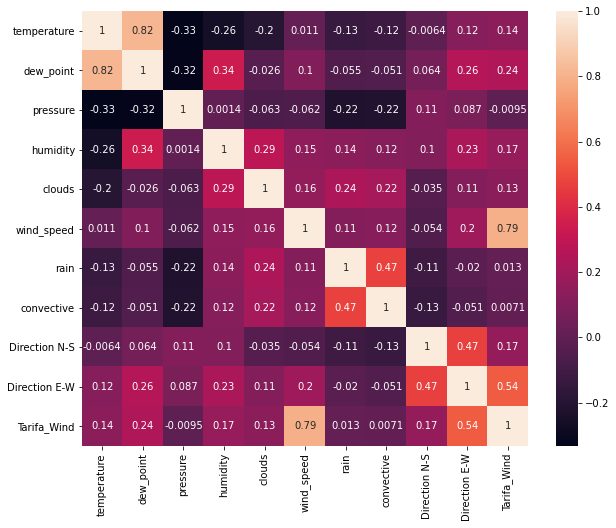

In [38]:
plt.figure(figsize=(10,8))
sns.heatmap(pd.concat([features,target],axis =1).corr(),annot=True)

In [39]:
# Loading naive models

lr = LinearRegression()
knr = KNeighborsRegressor()
tree = DecisionTreeRegressor()
forest = RandomForestRegressor()

# Setting up train / test

features_train, features_test, target_train, target_test = train_test_split(features,target)


In [40]:
lr.fit(features_train,target_train)
prediction = lr.predict(features_test)

metrics = metrics.append(evaluate("lr", target_test, prediction), ignore_index=True)

In [41]:
knr.fit(features_train,target_train)
prediction = knr.predict(features_test)

metrics = metrics.append(evaluate("knr", target_test, prediction), ignore_index=True)

In [42]:
tree.fit(features_train,target_train)
prediction = tree.predict(features_test)

metrics = metrics.append(evaluate("tree", target_test, prediction), ignore_index=True)

In [43]:
forest.fit(features_train,target_train)
prediction = forest.predict(features_test)

metrics = metrics.append(evaluate("forest", target_test, prediction), ignore_index=True)

<ipython-input-43-364559d53b08>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(features_train,target_train)


In [44]:
metrics

,model,mse,mae,mape,ev,r2
0,baseline,14.737,3.102,standby,0.617,-0.000
1,lr,7.917,2.206,standby,0.796,0.463
2,knr,11.739,2.683,standby,0.698,0.203
3,tree,11.578,2.613,standby,0.701,0.214
4,forest,6.067,1.884,standby,0.844,0.588


## 2.- Regressors with pre data standarization

- **Prepoc**  = StaandarScaler 

- **Models:** Linnear Regressor,  KNeighbours, Decission Tree, Random Forest



In [45]:
# Loading naive models

lr = LinearRegression()
knr = KNeighborsRegressor()
tree = DecisionTreeRegressor()
forest = RandomForestRegressor()

# Scaler

scaler = StandardScaler()

# Setting up train / test

features_train, features_test, target_train, target_test = train_test_split(features,target)


In [46]:
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

In [47]:
lr.fit(features_train,target_train)
prediction = lr.predict(features_test)

metrics = metrics.append(evaluate("lr + std", target_test, prediction), ignore_index=True)

In [48]:
knr.fit(features_train,target_train)
prediction = knr.predict(features_test)

metrics = metrics.append(evaluate("knr + std", target_test, prediction), ignore_index=True)

In [49]:
tree.fit(features_train,target_train)
prediction = tree.predict(features_test)

metrics = metrics.append(evaluate("tree + stdr", target_test, prediction), ignore_index=True)

In [50]:
forest.fit(features_train,target_train)
prediction = forest.predict(features_test)

metrics = metrics.append(evaluate("forest+ std", target_test, prediction), ignore_index=True)

<ipython-input-50-945cbb74259d>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(features_train,target_train)


In [108]:
metrics_ordered = metrics.sort_values(by='mse')
metrics_ordered

,model,mse,mae,mape,ev,r2
8,forest+ std,5.607,1.826,standby,0.848,0.620
4,forest,6.067,1.884,standby,0.844,0.588
6,knr + std,7.003,2.062,standby,0.811,0.525
5,lr + std,7.353,2.148,standby,0.801,0.501
1,lr,7.917,2.206,standby,0.796,0.463
7,tree + stdr,10.769,2.540,standby,0.709,0.269
3,tree,11.578,2.613,standby,0.701,0.214
2,knr,11.739,2.683,standby,0.698,0.203
0,baseline,14.737,3.102,standby,0.617,-0.000


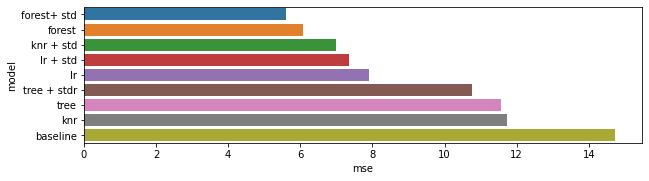

In [104]:
plt.subplots(figsize=(10,2.5))
sns.barplot(x= metrics_ordered['mse'],y = metrics_ordered['model']);

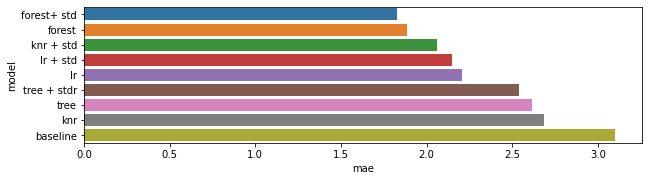

In [105]:
plt.subplots(figsize=(10,2.5))
sns.barplot(x= metrics_ordered['mae'],y = metrics_ordered['model']);

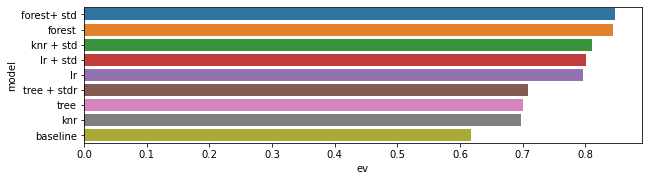

In [106]:
plt.subplots(figsize=(10,2.5))
sns.barplot(x= metrics_ordered['ev'],y = metrics_ordered['model']);

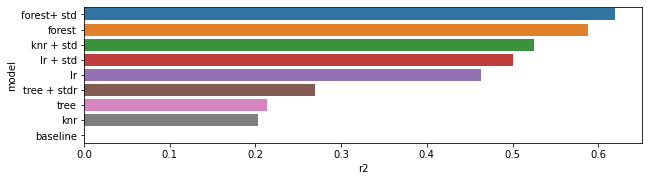

In [107]:
plt.subplots(figsize=(10,2.5))
sns.barplot(x= metrics_ordered['r2'],y = metrics_ordered['model']);

# 3.- Adding lags to features

# 4.- Pre clustering